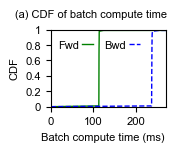

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8

plt.rcParams["font.family"] = 'Arial'
linewidth=1


filename = 'resnet50-batch128-v100.csv'
columns = ['cpu2gpu_time', 'forward_time', 'backward_time']

df = pd.read_csv(filename, delimiter='\t', names=columns)
forward = [float(x) for x in df['forward_time'].to_list()]
backward = [float(x) for x in df['backward_time'].to_list()]
# # drop the first 5 values
# dl = dl[5:-1]
forward.insert(0,0)
backward.insert(0,0)


figure, axes = plt.subplots()
x_range = [0,0.27]
y_range = [0,1]
axes.set_xlim(x_range)
axes.set_ylim(y_range)
plt.xticks([0,0.1,0.2], ['0',100,200],fontsize=fontsize)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1], fontsize=fontsize)

forward_sorted = np.sort(forward)
forward_cdf = np.arange(0, len(forward_sorted)) / float(len(forward_sorted)-1)
plt.plot(forward_sorted, forward_cdf, linewidth=linewidth, label='Fwd', color='green')

backward_sorted = np.sort(backward)
backward_cdf = np.arange(0, len(backward_sorted)) / float(len(backward_sorted)-1)
plt.plot(backward_sorted, backward_cdf, linewidth=linewidth, label='Bwd', color='blue', linestyle="--")


plt.xlabel('Batch compute time (ms)', fontsize=fontsize, x=0.45)
plt.ylabel('CDF', fontsize=fontsize)
plt.title('(a) CDF of batch compute time', fontsize=fontsize, y=1.05, x=0.35)

plt.legend(fontsize=fontsize, markerfirst=False, borderpad=0.2,
           bbox_to_anchor=(0.42, 0.8), handlelength=1, handletextpad=0.3,
           frameon=False, ncol=2, loc="center", columnspacing=1)
figure.set_size_inches(1.48, 1)
figure.set_dpi(100)
plt.savefig('cdf.eps', bbox_inches='tight', transparent=True)

plt.show()